# Practical Statistics for Data Scientists (Python)

## Chapter 1 - Exploratory Data Analysis

In [22]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

import wquantiles

import os 
# os.getcwd()
# os.chdir('')



## Estimates of Location

In [52]:
# import data

state = pd.read_csv('data/state.csv')

dfw = pd.read_csv('data/dfw_airline.csv')

sp500_px = pd.read_csv('data/sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('data/sp500_sectors.csv')

In [24]:
state['Population'].mean()

6162876.3

In [25]:
trim_mean(state['Population'], 0.1)

4783697.125

In [26]:
state['Population'].median()

4436369.5

In [27]:
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [28]:
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))

4.4


# Estimates of Variability

## Example: Variability estimates of state population

In [29]:
state['Population'].std() # standard deviation

6848235.347401142

In [30]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25) # IQR

4847308.0

In [31]:
robust.scale.mad(state['Population']) # median absolute deviation

3849876.1459979336

# Exploring the Data Distribution

## Percentiles and Boxplots

In [32]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.50, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

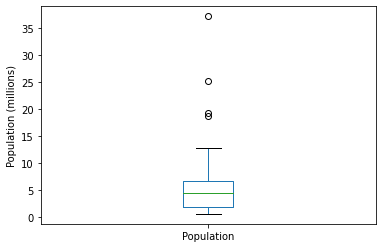

In [34]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

## Frequency Tables and Histograms

In [36]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

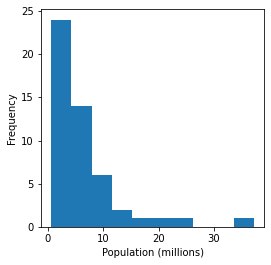

In [37]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (4, 4))
ax.set_xlabel('Population (millions)')

## Density Plots and Estimates

Text(0.5, 0, 'Murder Rate (per 100,000)')

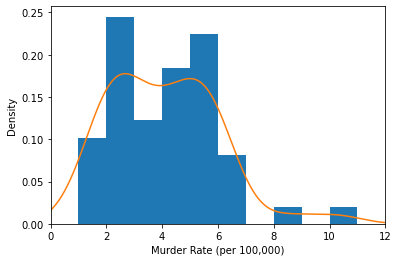

In [38]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12))
state['Murder.Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100,000)')

## Exploring Binary and Categorical Data

Text(0, 0.5, 'Count')

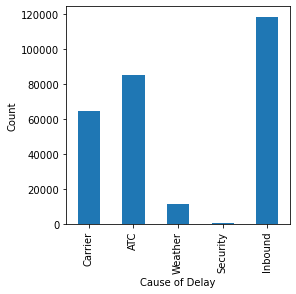

In [42]:
ax = dfw.transpose().plot.bar(figsize = (4, 4), legend = False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

## Correlation

<AxesSubplot:>

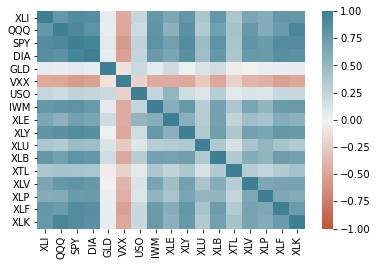

In [53]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
                    
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
            cmap = sns.diverging_palette(20, 220, as_cmap = True))
